In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#reading in the retail sales data - this includes both seasonally adjusted and non seasonally adjusted data
retail_sales = pd.read_excel("US Retail Sales.xlsx")
retail_sales

,Date,retailsales_sa,retailsales_nsa
0,1992-01-01,146925,130683
1,1992-02-01,147223,131244
2,1992-03-01,146805,142488
3,1992-04-01,148032,147175
4,1992-05-01,149010,152420
...,...,...,...
383,2023-12-01,608730,668957
384,2024-01-01,601921,552441
385,2024-02-01,606720,555528
386,2024-03-01,611381,610478


In [3]:
#checking the type of each column
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             388 non-null    datetime64[ns]
 1   retailsales_sa   388 non-null    int64         
 2   retailsales_nsa  388 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 9.2 KB


In [4]:
#take logs of both series
retail_sales['l_rs_sa'] = np.log(retail_sales['retailsales_sa'])
retail_sales['l_rs_nsa'] = np.log(retail_sales['retailsales_nsa'])
retail_sales

,Date,retailsales_sa,retailsales_nsa,l_rs_sa,l_rs_nsa
0,1992-01-01,146925,130683,11.897678,11.780530
1,1992-02-01,147223,131244,11.899704,11.784813
2,1992-03-01,146805,142488,11.896860,11.867013
3,1992-04-01,148032,147175,11.905184,11.899378
4,1992-05-01,149010,152420,11.911769,11.934395
...,...,...,...,...,...
383,2023-12-01,608730,668957,13.319130,13.413475
384,2024-01-01,601921,552441,13.307881,13.222102
385,2024-02-01,606720,555528,13.315823,13.227674
386,2024-03-01,611381,610478,13.323476,13.321998


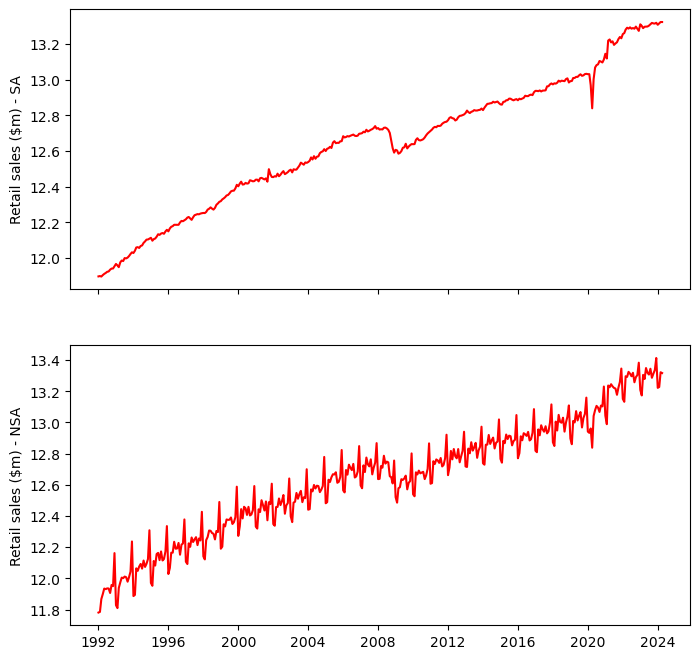

In [5]:
#plotting both series
fig, (ax1,ax2) = plt.subplots(nrows = 2, sharex=True, figsize=(8,8))
ax1.plot(retail_sales['Date'], retail_sales['l_rs_sa'], c='red')
ax2.plot(retail_sales['Date'], retail_sales['l_rs_nsa'], c='red')
ax1.set_ylabel('Retail sales ($m) - SA')
ax2.set_ylabel('Retail sales ($m) - NSA')
plt.show()

In [6]:
#the series are both clearly non-stationary but the ADF tests should confirm this
def stationarity(series, regression_type):
    test = adfuller(series, maxlag=None, regression=regression_type, autolag='AIC')
    pvalue = test[1]
    if pvalue < 0.05:
        print('Reject null hypothesis of non stationarity - p value: ' + str(pvalue))
    else:
        print('Do not reject null hypothesis of non stationarity - p value: ' + str(pvalue))

In [7]:
stationarity(retail_sales['l_rs_sa'], 'ct')

Do not reject null hypothesis of non stationarity - p value: 0.18648892428913538


In [8]:
stationarity(retail_sales['l_rs_nsa'], 'ct')

Do not reject null hypothesis of non stationarity - p value: 0.17432619719217457


In [9]:
#We need to take differences of both series to ensure stationarity

retail_sales['d_l_rs_sa'] = 100*(retail_sales['l_rs_sa'].diff())
retail_sales['d_l_rs_nsa'] = 100*(retail_sales['l_rs_nsa'].diff())

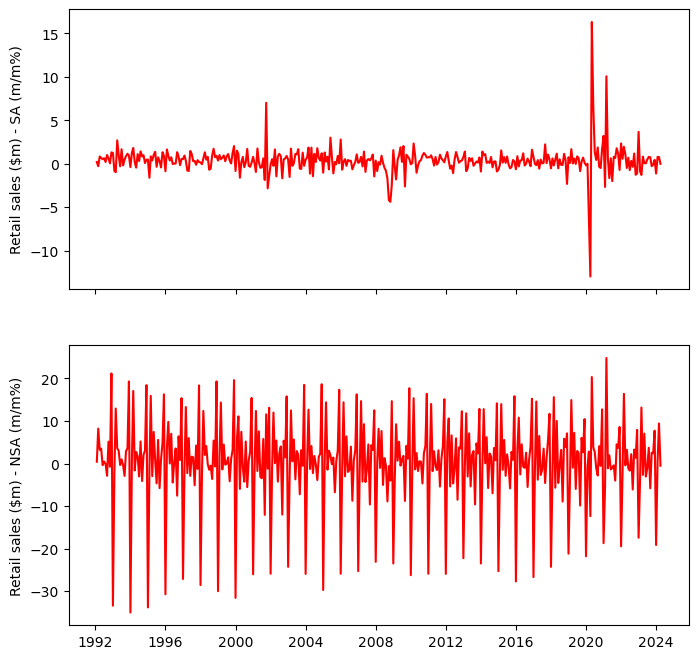

In [10]:
# plotting differenced series

fig, (ax1,ax2) = plt.subplots(nrows = 2, sharex=True, figsize=(8,8))
ax1.plot(retail_sales['Date'], retail_sales['d_l_rs_sa'], c='red')
ax2.plot(retail_sales['Date'], retail_sales['d_l_rs_nsa'], c='red')
ax1.set_ylabel('Retail sales ($m) - SA (m/m%)')
ax2.set_ylabel('Retail sales ($m) - NSA (m/m%)')
plt.show()

In [11]:
#dropping the missing values
retail_sales = retail_sales.dropna()
retail_sales

,Date,retailsales_sa,retailsales_nsa,l_rs_sa,l_rs_nsa,d_l_rs_sa,d_l_rs_nsa
1,1992-02-01,147223,131244,11.899704,11.784813,0.202619,0.428364
2,1992-03-01,146805,142488,11.896860,11.867013,-0.284327,8.219960
3,1992-04-01,148032,147175,11.905184,11.899378,0.832329,3.236457
4,1992-05-01,149010,152420,11.911769,11.934395,0.658495,3.501751
5,1992-06-01,149800,151849,11.917056,11.930642,0.528765,-0.375326
...,...,...,...,...,...,...,...
383,2023-12-01,608730,668957,13.319130,13.413475,0.443708,7.730923
384,2024-01-01,601921,552441,13.307881,13.222102,-1.124861,-19.137314
385,2024-02-01,606720,555528,13.315823,13.227674,0.794119,0.557237
386,2024-03-01,611381,610478,13.323476,13.321998,0.765293,9.432324


In [12]:
stationarity(retail_sales['d_l_rs_sa'], 'c')

Reject null hypothesis of non stationarity - p value: 6.511496286193759e-05


In [13]:
stationarity(retail_sales['d_l_rs_nsa'], 'c')

Reject null hypothesis of non stationarity - p value: 0.0012080606004925074


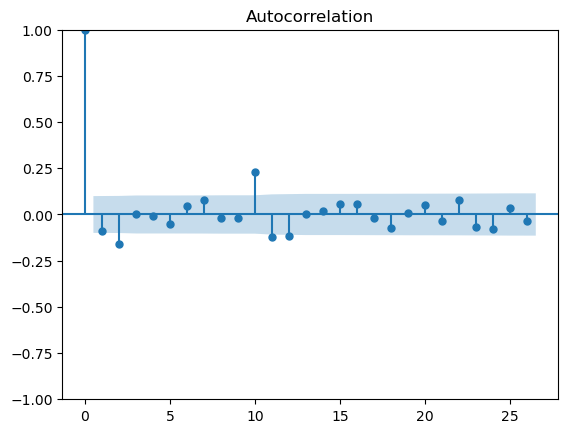

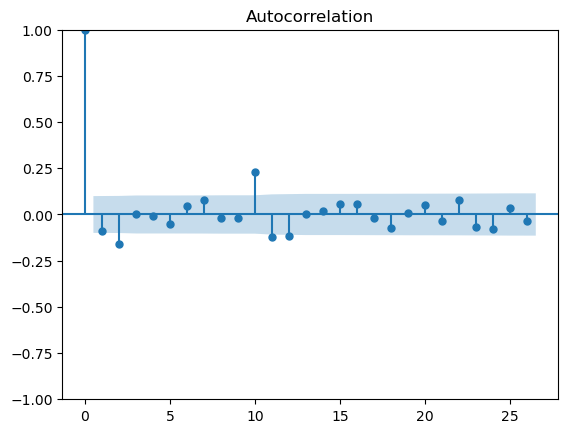

In [14]:
#As the differenced series are both stationary, we can model them - we will model the seasonally adjusted series using an ARMA model
#First plot the ACF function to determine q, the number of lags of the error term to be included (ie. the MA component)

plot_acf(retail_sales['d_l_rs_sa'])

c:\Users\varun\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


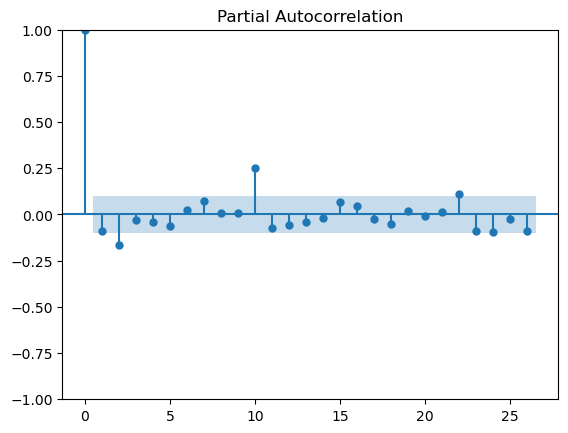

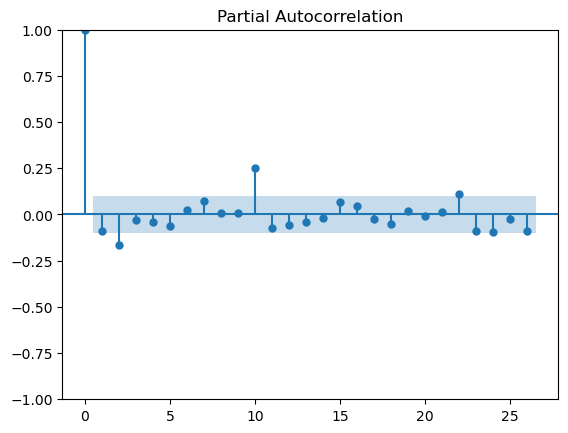

In [15]:
#Plotting the PACF to determine the number of lags of retail sales to be included, ie the AR component
plot_pacf(retail_sales['d_l_rs_sa'])

In [16]:
#using this methodology, it seems that the best model is ARMA(10,12) - last significant lag in ACF is 12 and last significant lag in PACF is 10

# splitting the data into a training set and a test set - using training data from 1992 to 2022
train = retail_sales[['d_l_rs_sa','Date']]
train = train[train['Date'] < '2023']
train = train['d_l_rs_sa']

In [ ]:
model = ARIMA(train, order=(10,0,12))
fitted_model = model.fit()

In [ ]:
# We will also aim to determine the best model by minimising the AIC - we can then compare this model to the one chosen by the ACF and the PACF

order_aic = []

for p in range(12):
	for q in range(12):
		model_looped = ARIMA(train, order=(p,0,q))
		results_looped = model_looped.fit()

		order_aic.append((p,q, results_looped.aic))

order_df = pd.DataFrame(order_aic, columns=['p', 'q','aic'])

In [19]:
order_df.sort_values('aic')

,p,q,aic
124,10,4,1405.090366
35,2,11,1405.435295
132,11,0,1405.856157
120,10,0,1406.057674
70,5,10,1406.464111
...,...,...,...
97,8,1,1424.495246
98,8,2,1424.673746
109,9,1,1425.015204
108,9,0,1425.798029


In [ ]:
#according to the AIC criteria, the best model is an ARMA(10,4) model 

model_AIC = ARIMA(train, order=(10,0,4))
fitted_model_AIC = model_AIC.fit()

In [ ]:
#comparing the two models based on forecast performance - we will forecast the values for January 2023 to April 2024
forecast1 = fitted_model.get_forecast(steps=17)
forecast1_values = forecast1.predicted_mean

forecast2 = fitted_model_AIC.get_forecast(steps=17)
forecast2_values = forecast2.predicted_mean

In [22]:
#comparing to the test data:
test_data = retail_sales[['d_l_rs_sa', 'Date']]
test_data = retail_sales[retail_sales['Date'] >= '2023']

forecast_dates = test_data['Date']
test_values = test_data['d_l_rs_sa']

In [23]:
#Turning the forecasts into series, and dropping the first one (which is for December 2022)

forecast1_values_series = pd.Series(forecast1_values)
forecast1_values_series = forecast1_values_series.drop(forecast1_values_series.index[0])

forecast2_values_series = pd.Series(forecast2_values)
forecast2_values_series = forecast2_values_series.drop(forecast2_values_series.index[0])

In [24]:
#creating a dataframe with the actual values and the forecasted values from both models

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Actual': test_values,
    'Model1': forecast1_values_series,
    'Model2': forecast2_values_series
})

In [25]:
forecast_df

,Date,Actual,Model1,Model2
372,2023-01-01,3.670033,0.261767,0.675552
373,2023-02-01,-0.869057,-0.503692,-0.333215
374,2023-03-01,-1.289971,0.157223,0.355346
375,2023-04-01,0.807928,-0.852882,0.219510
376,2023-05-01,0.079915,1.016009,0.555929
377,2023-06-01,0.042785,0.662383,0.412438
378,2023-07-01,0.486796,1.539008,0.585190
379,2023-08-01,0.789315,-0.623728,-0.143044
380,2023-09-01,0.746317,-0.525603,-0.051046
381,2023-10-01,-0.281669,1.480388,0.832140


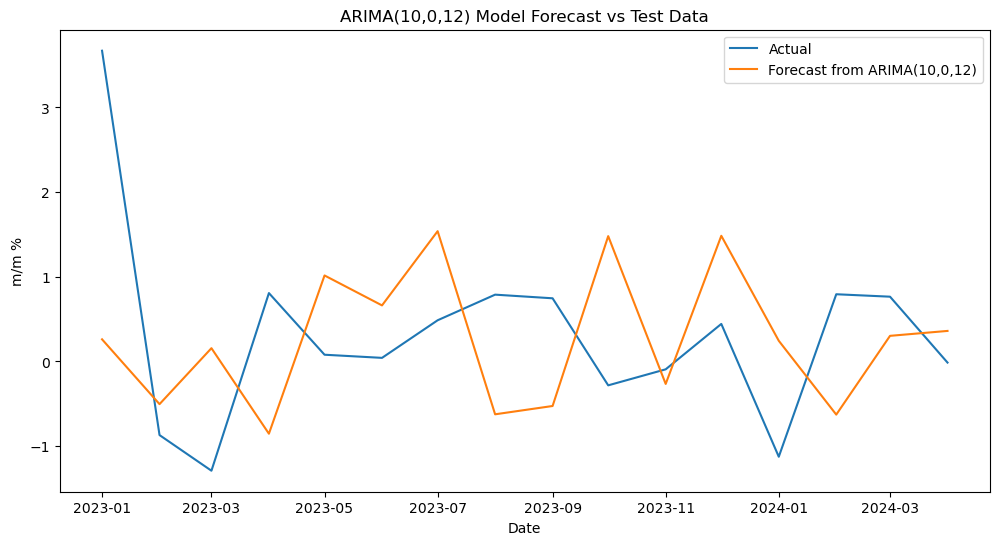

In [26]:
#Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Actual'], label = 'Actual')
plt.plot(forecast_df['Date'], forecast_df['Model1'], label='Forecast from ARIMA(10,0,12)')
plt.legend()
plt.title('ARIMA(10,0,12) Model Forecast vs Test Data')
plt.xlabel('Date')
plt.ylabel('m/m %')
plt.show()

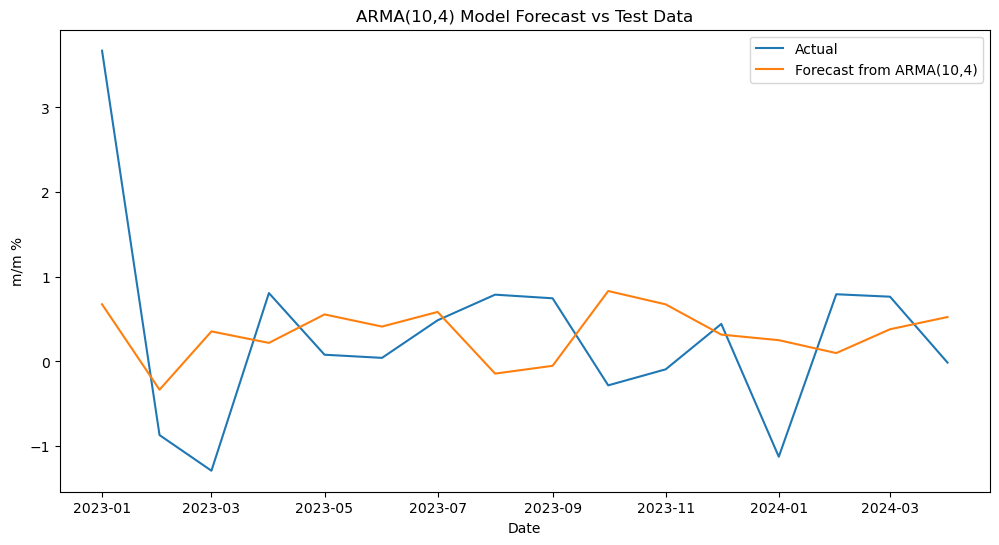

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Actual'], label = 'Actual')
plt.plot(forecast_df['Date'], forecast_df['Model2'], label='Forecast from ARMA(10,4)')
plt.legend()
plt.title('ARMA(10,4) Model Forecast vs Test Data')
plt.xlabel('Date')
plt.ylabel('m/m %')
plt.show()

In [28]:
#Comparing the RMSE

def rmse(dataframe, actual, forecasted):
    differences = dataframe[actual] - dataframe[forecasted]
    squared_differences = differences ** 2
    mean_squared_error = squared_differences.mean()
    rmse = np.sqrt(mean_squared_error)
    return rmse*100

In [29]:
rmse(forecast_df, 'Actual', 'Model1')

139.30795833509464

In [30]:
rmse(forecast_df, 'Actual', 'Model2')

108.53049980260711

In [31]:
#Model 2 was a better model - however both models don't seem to capture the extreme swings in retail sales growth